In [1]:
%matplotlib inline
import intake
import matplotlib
import matplotlib.pyplot as plt
import dask

In [2]:
catalog_url = 'https://raw.githubusercontent.com/NicWayand/example.pangeo.io-deploy/staging/deployments/polar.pangeo.io/image/catalog.yaml'

In [3]:
from dask.distributed import Client, progress
from dask_kubernetes import KubeCluster
cluster = KubeCluster(n_workers=4)
cluster

In [4]:
client = Client(cluster)
client

Client Scheduler: tcp://10.28.20.9:39952 Dashboard: /user/nicwayand/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [5]:
NSIDC_0081 = intake.Catalog(catalog_url).NSIDC_0081.to_dask()

In [6]:
NSIDC_0051 = intake.Catalog(catalog_url).NSIDC_0051.to_dask()

In [7]:
NSIDC_0079 = intake.Catalog(catalog_url).NSIDC_0079.to_dask()

### Plot Pan-Arctic sea ice Extent from the three different data sets

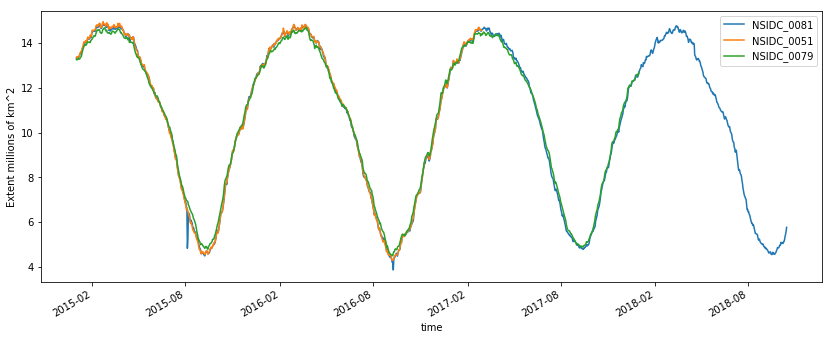

In [8]:
plt.figure(figsize=(14,5))
NSIDC_0081.sel(time=slice('2015-01-01','2018-10-17')).extent.plot(label='NSIDC_0081')
NSIDC_0051.sel(time=slice('2015-01-01','2018-10-17')).extent.plot(label='NSIDC_0051')
NSIDC_0079.sel(time=slice('2015-01-01','2018-10-17')).extent.plot(label='NSIDC_0079')
plt.ylabel('Extent millions of km^2')
plt.legend()